## Problem Statement

### Context

Wine is a beverage made from fermented grapes and other fruit juices with a low amount of alcohol content. Wine is the second most popular alcoholic drink in the world after beer, and it is one of the most highly consumed beverages.

Generally, the quality of wine is graded based on the taste of the wine and vintage but this process is time-consuming, costly, and not efficient as the quality of the wine also depends on other physiochemical attributes like fixed acidity, volatile acidity, etc. Also, it is not always possible to ensure wine quality by experts when there is a huge demand for the product as it will increase the cost significantly.

### Objective:

Moonshine is a red wine company that produces premium high-quality wines. The company wants to improve its production efficiency and reduce the cost and additional time involved in wine tasting. You as a data scientist at Moonshine company have to build a predictive model that can help to identify the premium and non premium wines using the available data.

### Data Description:

- fixed acidity: Fixed Acidity impart sourness and resist microbial infection, measured in no. of grams of tartaric acid per dm3
- volatile acidity: No. of grams of acetic acid per dm3 of wine. Too high levels can lead to an unpleasant, vinegar-like taste
- citric acid: No. of grams of citric acid per dm3 of wine. Citric acid can add freshness and flavor to wines
- residual sugar: Remaining sugar after fermentation stops, measured in no. of grams per dm3.
- chlorides: No. of grams of sodium chloride i.e. salt per dm3 of wine
- free sulfur dioxide: No. of grams of free sulfite per dm3 of wine
- total sulfur dioxide: No. of grams of total sulfite (free sulphite+ bound) per dm3 of wine
- density: Density in gram per cm3
- pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic). The pH of the wine can help measure the ripeness of the wine
- sulphates: No. of grams of potassium sulfate per dm3 of wine
- alcohol: Volume of alcohol in percentage 
- quality_class: Wine quality non-premium and premium

## Import necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

## Reading the dataset

In [ ]:
wine = pd.read_csv('/content/Wine_quality_dataset_1.csv')

In [ ]:
# copying data to another varaible to avoid any changes to original data
data = wine.copy()

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,non-premium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,non-premium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,non-premium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,non-premium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,non-premium


## Overview of the dataset

### Displaying the first and last 5 rows of the dataset

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,non-premium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,non-premium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,non-premium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,non-premium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,non-premium


In [ ]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,non-premium
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,non-premium
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,non-premium
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,non-premium
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,non-premium


### Understand the shape of the dataset.

In [ ]:
data.shape

(1599, 12)

* There are 1,599 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality_class         1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


**Observations-**
* All features are numeric types.
* There are no missing values in the data.

### Summary of the dataset.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.319575,32.082840,6.00000,22.0000,38.00000,62.000000,165.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**Observations-**
* The maximum rating of wine is 8 and the third quartile value is 6 i.e. at least 75% of wines have a rating of 6 or below.
* There might be outliers in data where the wines have high sulfur dioxide (free sulfur dioxide and total sulfur dioxide) content as there is a big difference in the 3rd quartile and maximum values.
* Most wines are on a pH scale between 3 and 4.

### Data Preparation for Modeling

In [ ]:
X = data.drop('quality_class', axis=1)
y = data['quality_class'].apply(lambda x : 0 if x=='non-premium' else 1 )

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(1119, 11) (480, 11)


**Note**: The stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.

In [ ]:
y.value_counts(1)

0    0.86429
1    0.13571
Name: quality_class, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.864583
1    0.135417
Name: quality_class, dtype: float64

## Model evaluation criterion


**The model can make wrong predictions as:**
1. Predicting a wine is of premium quality when it is of non-premium quality.
2. Predicting a wine is of non-premium quality when it is of premium quality.

**Which case is more important? **
1. If the model predicts a wine is of non-premium quality but it is of premium quality then the company would incur the loss of good wine and resources used.
2. If the model predicts a wine is of premium quality but it is not then the company would roll out low-quality wine which would affect their customer base and their reputation. 

**Which metric to optimize?**
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
  

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
          },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building - Gradient Boosting Classifier

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
model_train_perf

Training Performance



,Accuracy,Recall,Precision,F1
0,0.969616,0.782895,0.991667,0.875


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
model_test_perf

Test Performance



,Accuracy,Recall,Precision,F1
0,0.90625,0.492308,0.727273,0.587156


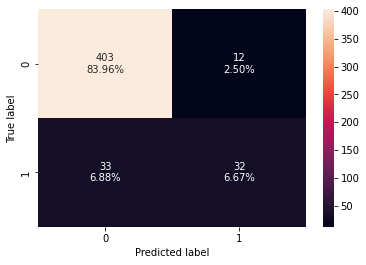

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* The gradient boosting classifier is overfitting the training data.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
model_train_perf

Training Performance



,Accuracy,Recall,Precision,F1
0,0.993744,0.953947,1.0,0.976431


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
model_test_perf

Test Performance



,Accuracy,Recall,Precision,F1
0,0.910417,0.523077,0.73913,0.612613


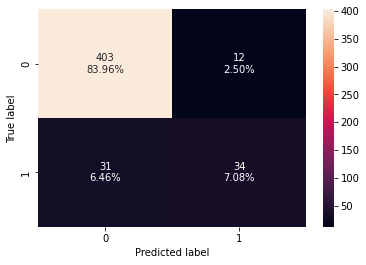

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

___